In [16]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [17]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [18]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis,  : ]
  return img

In [19]:
content_image = load_image('/content/yoda.jpg')

In [20]:
content_image.shape

TensorShape([1, 540, 720, 3])

In [21]:
style_image = load_image('/content/mex4.jpg')

(-0.5, 719.5, 539.5, -0.5)

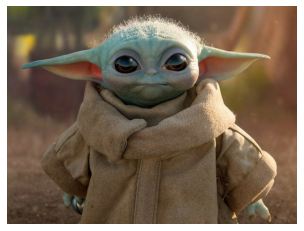

In [22]:
plt.imshow(np.squeeze(content_image))
plt.axis('off')

(-0.5, 402.5, 493.5, -0.5)

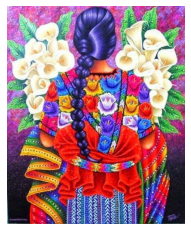

In [23]:
plt.imshow(np.squeeze(style_image))
plt.axis('off')

In [24]:
stylized_image = model(content_image, style_image)[0]

In [ ]:
stylized_image.shape

TensorShape([1, 540, 720, 3])

(-0.5, 719.5, 539.5, -0.5)

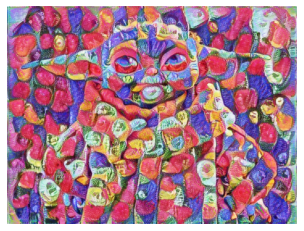

In [25]:
plt.imshow(np.squeeze(stylized_image))
plt.axis('off')

In [26]:
cv2.imwrite('generated_image.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True